In [1]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from tqdm import tqdm

In [2]:
documents = []

with open('documents.txt', mode='r') as fp:
    for line in tqdm(fp):
        line = line.split()
        tag = line[0]
        document = line[1:]

        documents.append(TaggedDocument(document, [tag]))

245340it [00:01, 193664.54it/s]


In [3]:
model = Doc2Vec(documents)

In [4]:
dataset_name = 'ogbg-molbbbp'

In [5]:
from graphtoolbox import OgbDataLoader
ogb_data_loader = OgbDataLoader()
X_raw_graphs, y, split_idx = ogb_data_loader.get_processed_dataset(dataset_name)

/home/cstaib/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 2039/2039 [00:00<00:00, 4550.31it/s]


In [6]:
import numpy as np

X_train = np.array([model.dv[i] for i in split_idx['train']])
y_train = np.array([y[i] for i in split_idx['train']]).ravel()

X_test = np.array([model.dv[i] for i in split_idx['test']])
y_test = np.array([y[i] for i in split_idx['test']]).ravel()

In [7]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

reg = RandomForestClassifier()
reg.fit(X_train, y_train)
y_test_predictions = reg.predict(X_test)

In [15]:
from ogb.graphproppred import Evaluator

evaluator = Evaluator(name = dataset_name)
input_dict = {"y_true": y_test.reshape(-1, 1), "y_pred": y_test_predictions.reshape(-1, 1)}
result_dict = evaluator.eval(input_dict)
result_dict

{'rocauc': 0.541087962962963}

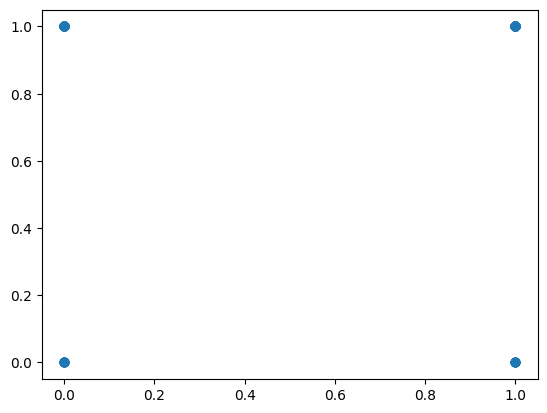

In [8]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_predictions)